# Zipf's Law

In this guide we'll write some code to look at some word distributions and power laws.

## The data
The data folder contains 71 files:

- Thirty files labelled p0.txt – p29.txt, with text extracted from ten recent news articles about politics.
- Thirty files labelled s0.txt – s29.txt, with text extracted from ten recent news articles about sports.
- Ten files labelled t0.txt – t9.txt, which will be the “test set”.

First, let's import the texts themselves into our notebook.

In [1]:
ptexts=[open('data/p{}.txt'.format(i)).read() for i in range(30)]
stexts=[open('data/s{}.txt'.format(i)).read() for i in range(30)]
ttexts=[open('data/t{}.txt'.format(i)).read() for i in range(10)]

The following code iterates through the sixty training texts, and accumulates their word counts in the Counter object `thewords`:

In [2]:
%pylab inline
from collections import Counter

thewords=Counter()
for txt in ptexts+stexts:
    thewords += Counter(txt.lower().split())

Populating the interactive namespace from numpy and matplotlib


For instance, we could look at the 10 most common words in the Counter object `thewords` by using the `most_common` method as follows:

In [3]:
thewords.most_common(10)

[('the', 3692),
 ('to', 1688),
 ('a', 1665),
 ('of', 1578),
 ('and', 1478),
 ('in', 1223),
 ('that', 921),
 ('is', 644),
 ('for', 625),
 ('he', 612)]

In [4]:
import numpy as np
words,nw=zip(*thewords.most_common())

Total number of words in the corpus:

In [5]:
corpus = sum(nw)
print(corpus)

63827


## Rank frequency graph

The frequency of occurrence vs. the rank of the word.

Now we plot the number of occurrences in the `thewords` dictionary on the y-axis, ordered so that the word with the largest number of occurrences is plotted first, the word with second largest number of occurrences is plotted second, and so on.

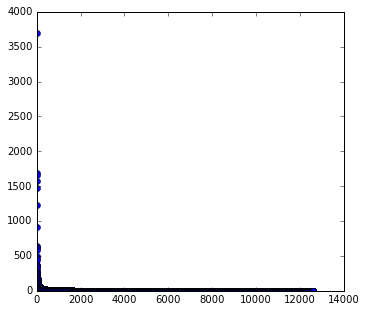

In [6]:
figure(figsize=(5.5,5))
r=arange(1,len(nw)+1)
plot(r,nw,'o');

As we notice from the graph above it is difficult to see the overall structure of this data since most of the values are so small. A standard method is to plot using logarithmic scales, so that a fixed distance along the axis corresponds to say a factor of 10 (rather than just adding 10). This can be implemented by adding xscale('log') or yscale('log'), or both, before or after the plot() command; or by using loglog() instead of plot(). They give the same type of plot.

Now, we extract the counts for the top 500 words in our thewords dictionary, and plot those counts against the word ranks. We also annotate the top ten words on the graph with what they are. Finally we try to fit the data we have plotted with a straight line.

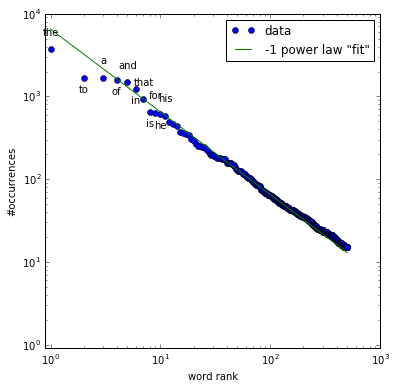

In [7]:
figure(figsize=(6,6))
r=1+arange(500)
loglog(r,nw[:500],'o')
plot(r,6500./r)
for x,y,w in list(zip(r,nw,words))[:11]:
#    text(x,(1.1 if x%2 else .75)*y,w,ha='center')
    text(x,(1.5 if x%2 else .67)*y,w,ha='center')
xlim(.9,1e3)
ylim(.9,1e4)
xlabel('word rank')
ylabel('#occurrences')
legend(['data','-1 power law "fit"']);

## Results

Many data points do fall roughly along a straight line in log-log space (Zipf's law), even for this tiny amount of data, which amount only to the sixty short training set articles.